Jan Wawrzynek

In [ ]:
# Load packages
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import numpy as np

f = open('planets.csv')
planets_1 = f.readlines()
f.close()


with open('planets.csv') as f:
    planets = f.readlines()


planets_1 == planets

True

In [ ]:
# Strip the newline character \n from the end of each line. Exclude comments (i.e. lines starting with the symbol #)
planets = [string.strip('\n') for string in planets if string.startswith('#') == False]
# Split each line of the file into a list (the commas separate individual list elements)
planets = [string.split(',') for string in planets]
labels = planets[0]
print(labels)

np.shape(planets)

['pl_name', 'hostname', 'disc_year', 'disc_facility', 'pl_orbsmax', 'pl_bmassj', 'st_mass', 'sy_dist']


(5091, 8)

In [ ]:
disc_year = [int(entry[2]) for entry in planets[1:]]

# A dictionary yielding the facility at which each planet was discovered
disc_fac = {}
for p in planets[1:]:
    name, facility = p[0], p[3]
    disc_fac[name] = facility

# Access the discovery facility from the dictionary by using the name of the planet
disc_fac['11 Com b']

'Xinglong Station'

Finding how many planets were discovered per year



[1989, 1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022] [1, 2, 1, 1, 6, 1, 6, 13, 16, 12, 29, 22, 27, 36, 31, 52, 66, 95, 97, 138, 139, 126, 876, 157, 1518, 153, 326, 203, 233, 524, 183]


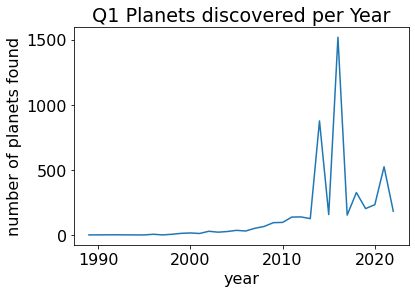

In [ ]:
years = [int(entry[2])  for entry in planets[1:]]
#print(years)
Planets_discovered = [years.count(entry) for entry in set(years)]

years.sort()
years_ordered = []
for entry in years:
    if entry not in years_ordered:
        years_ordered.append(entry)


print(years_ordered, Planets_discovered)
plt.xlabel("year")
plt.ylabel("number of planets found")
plt.plot(years_ordered, Planets_discovered)


plt.title("Q1 Planets discovered per Year")
plt.show()

Exercise 2 How does a planet's mass correlate with the mass of its star?



Text(0.5, 1.0, 'Q1B Planet Mass vs Star Mass')

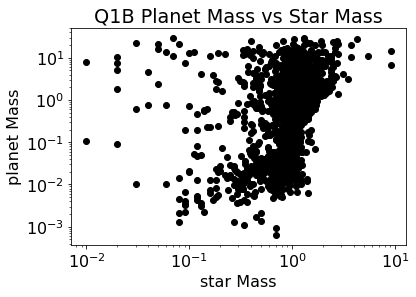

In [ ]:
#print(planets[4])
planet_mass = [float(entry[5]) for entry in planets[1:] if entry[5] and entry[6] != '']
star_mass = [float(entry[6]) for entry in planets[1:] if entry[5] and entry[6] != '']
#print(planet_mass, star_mass)
plt.loglog(star_mass, planet_mass, 'o', color='black')
plt.xlabel("star Mass")
plt.ylabel("planet Mass")
plt.title("Q1B Planet Mass vs Star Mass")



Finding Which facilities have discovered the most planets so far,and over how long of a time period

In [ ]:
planet_mass = [float(entry[5]) for entry in planets[1:] if entry[5] and entry[6] != '']

In [ ]:
facility = [(entry[3])  for entry in planets[1:]]
year = [(entry[2])  for entry in planets[1:]]
planets_found_fac = [facility.count(entry) for entry in set(facility)]

facility_list = []
for entry in facility:
    if entry not in facility_list:
        facility_list.append(entry)
#Here I combined the facility list and the number of planets found list into a dictionary so that I could then sort it 
#by number of planets found 
fac_numpla = {facility_list[i]: planets_found_fac[i] for i in range(len(fac))}

sorted_fac_numpla = sorted((fac_numpla.items()), key=lambda x:x[1], reverse = True)
print(sorted_fac_numpla)



[('Qatar', 2708), ('European Southern Observatory', 537), ('K2', 270), ('Roque de los Muchachos Observatory', 253), ('MEarth Project', 191), ('Oak Ridge Observatory', 184), ('Transiting Exoplanet Survey Satellite (TESS)', 113), ('Las Campanas Observatory', 81), ('Leoncito Astronomical Complex', 73), ('Anglo-Australian Telescope', 67), ('Yunnan Astronomical Observatory', 64), ('Spitzer Space Telescope', 39), ('Very Long Baseline Array', 37), ('Acton Sky Portal Observatory', 35), ('United Kingdom Infrared Telescope', 35), ('SuperWASP-North', 34), ('European Space Agency (ESA) Gaia Satellite', 32), ('Large Binocular Telescope Observatory', 31), ('TrES', 29), ('Teide Observatory', 29), ('Subaru Telescope', 25), ('XO', 24), ('Parkes Observatory', 22), ('Calar Alto Observatory', 16), ('Bohyunsan Optical Astronomical Observatory', 14), ('Kitt Peak National Observatory', 11), ('CHaracterising ExOPlanets Satellite (CHEOPS)', 10), ('Arecibo Observatory', 10), ('Mauna Kea Observatory', 10), ('Gem

In [ ]:
fac = {str(entry[3]) for entry in planets[1:]}
fac = list(fac)
num_fac = len(fac)
print(num_fac)
#code based on example from labsolutions1 q4
max_year, min_year = max(year), min(year)
#Trying to find the maximum and minimum year for each facility.
max_year, min_year = [0]*num_fac, [max_year]*num_fac
for entry in planets[1:]:
    this_year = float(entry[2])
    
    this_fac = str(entry[3])
    ind = fac.index(this_fac)
    # Check if there is a new max or min
    if this_year > max_year[ind]:
        max_year[ind] = this_year
    if this_year < float(min_year[ind]):
        min_year[ind] = this_year

# Like above combined the min year and facility lists to make dictionary
res = {fac[i]: min_year[i] for i in range(len(fac))}
print(res)
# Below I tried to sort the facilities in terms of year discovered, however I was getting type errors relating to the years. 
# I think that the issue was with the years being floats as a similar code worked for the number of planets above.
# Therefore I used the code in the prior cell to find the most prolific facilities and then I used this code to 
#manually look through those facilities and find their corresponding first years of discoveries, then I created a list of 
#the wanted values

#####################################################################################################################

#min_year = int(min_year)
#print(fac,min_year)
#sort_list = (fac, min_year)
#sort_list.sort(key = lambda x: x[2])
#res = {min_year[i]: fac[i] for i in range(len(fac))}

#res.sort(key = lambda x: x[1])
#sorted_res = sorted((res.items()), key=lambda x:x[1])
#print(sorted_res)
#dict(sorted(res.items(), key=lambda item: item[1]))
#sorted_res = sorted(res.items(), key=lambda x:x[1])

#def remove_empty_from_dict(d):
#    if type(d) is dict:
#        return dict((k, remove_empty_from_dict(v)) for k, v in d.items() if v and remove_empty_from_dict(v))
#    elif type(d) is list:
#        return [remove_empty_from_dict(v) for v in d if v and remove_empty_from_dict(v)]
#    else:
#        return d
#import pandas as pd

#series = res
#series.sort_values(axis=0, inplace=True, kind='quicksort', na_position='last', ignore_index=False, key=None)
#series.to_dict()
#print(series)
#print(d)
#print(sorted_res)
#3dict(sorted(d.items(), key=lambda item: item[1]))


67
{'Palomar Observatory': 2006.0, 'MEarth Project': 2009.0, 'European Southern Observatory': 2016.0, 'Teide Observatory': 2008.0, 'SuperWASP-North': 2016.0, 'KELT-South': 2016.0, 'Gemini Observatory': 2006.0, 'MOA': 2008.0, 'XO': 2006.0, 'Cerro Tololo Inter-American Observatory': 2015.0, 'Leoncito Astronomical Complex': 2012.0, 'Arecibo Observatory': 1992.0, 'Apache Point Observatory': 2016.0, 'United Kingdom Infrared Telescope': 2012.0, 'HATNet': 2006.0, 'Multiple Facilities': 2015.0, 'SuperWASP': 2007.0, 'Transiting Exoplanet Survey Satellite (TESS)': 2018.0, 'La Silla Observatory': 1999.0, 'CHaracterising ExOPlanets Satellite (CHEOPS)': 2020.0, 'Wide-field Infrared Survey Explorer (WISE) Sat': 2021.0, 'Calar Alto Observatory': 2017.0, 'Oak Ridge Observatory': 1989.0, 'SPECULOOS Southern Observatory': '2022', 'Winer Observatory': 2019.0, 'Haute-Provence Observatory': 1995.0, 'Paranal Observatory': 2004.0, 'Multiple Observatories': 1996.0, 'Anglo-Australian Telescope': 2000.0, 'Lick 

In [ ]:
#Here I took the data from the above prints and made a table with the required values.
observatories = ['Qatar','European Southern Observatory', 'K2', 'Roque de los Muchachos Observatory','MEarth Project',\
                'Oak Ridge Observatory','(TESS)', 'Las Campanas Observatory', \
                'Leoncito Astronomical Complex','Anglo-Australian Telescope']
Planets_discovered  = [2708,537,270,253,191,184,113,81,73,67]
year_first_planet = [2010, 2016,2014,2011, 2009,1989, 2018, 2008, 2012, 2000 ]

print('%-35s %-25s %-10s' %('Facility', 'Planets Discovered', 'Year of first discovery'))

for i in range(len(observatories)):
    print('%-35s %-25.2f %-10i' %(observatories[i], Planets_discovered[i], year_first_planet[i]))

Facility                            Planets Discovered        Year of first discovery
Qatar                               2708.00                   2010      
European Southern Observatory       537.00                    2016      
K2                                  270.00                    2014      
Roque de los Muchachos Observatory  253.00                    2011      
MEarth Project                      191.00                    2009      
Oak Ridge Observatory               184.00                    1989      
(TESS)                              113.00                    2018      
Las Campanas Observatory            81.00                     2008      
Leoncito Astronomical Complex       73.00                     2012      
Anglo-Australian Telescope          67.00                     2000      
